<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from bs4 import BeautifulSoup


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [2]:
csv = 'https://raw.githubusercontent.com/michhottinger/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv'
data = pd.read_csv(csv)
data.head(5)
#data.description

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
from bs4 import BeautifulSoup
import requests

data['text'] = data.description.map(lambda x: BeautifulSoup(x).get_text())
print(data['text'])
# soup = BeautifulSoup(data, 'lxml')
# print(soup.get_text())


#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
5      b'Create various Business Intelligence Analyti...
6      b'As Spotify Premium swells to over 96M subscr...
7      b"Everytown for Gun Safety, the nation's large...
8      b"MS in a quantitative discipline such as Stat...
9      b'Slack is hiring experienced data scientists ...
10     b'Who We Are\nBlackThorn Therapeutics is a com...
11     b'Part-timeAbout The Opportunity\nHere at Grub...
12     b"nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...
13     b'As Spotify Premium swells to over 96M subscr...
14     b'Experience with guiding R&D strategy for you...
15     b'The Atlantic is seeking a Data Scientist to ...
16     b'THE CHALLENGE\nEventbrite is big, bustling m...
17     b'ContractWe are looking

## 2) Use Spacy to tokenize the listings 

In [4]:
##### Your Code Here #####
# Tokenizer Pipe
#spacy tokenizer
# Tokenizer
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)
tokens = []

""" Make them tokens """

#stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['', ' ', '-', 'job', 'get', 'Requirements', 'got', 'Location', 'data', 'science'])
    
tokens = []

for doc in tokenizer.pipe(data['text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
data['tokens'] = tokens

In [5]:
data['tokens'].head(5)

0    [b"job, requirements:\nconceptual, understandi...
1    [b'job, description\n\nas, scientist, 1,, help...
2    [b'as, scientist, working, consulting, busines...
3    [b'$4,969, $6,756, monthcontractunder, general...
4    [b'location:, usa, \xe2\x80\x93, multiple, loc...
Name: tokens, dtype: object

In [6]:
#Create a fuction which takes a corpus of document and returns a dataframe of word counts for us to analyze.
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

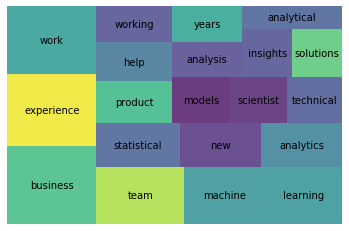

In [7]:
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc = count(data['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [8]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

text = list(data.text)
vect = CountVectorizer()
vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
# Get Word Counts for each document
dtm = pd.DataFrame(vect.transform(text).todense(), columns=vect.get_feature_names())
dtm.head(5)

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

/Users/michelle/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


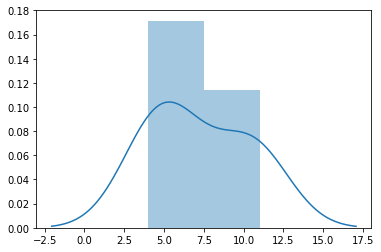

In [10]:
##### Your Code Here #####
doc_len = [len(doc) for doc in data]

import seaborn as sns

sns.distplot(doc_len);

#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [11]:
##### Your Code Here #####

text = list(data.text)

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(text)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.104421,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [12]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)


NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [13]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.30072527, 1.30498405, 1.32151492, 1.32832696]]),
 array([[  0, 276, 336, 274, 338]]))

In [14]:
# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [15]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[336]])

(array([[0.        , 1.21754151, 1.22566011, 1.22648127, 1.22715204]]),
 array([[336, 201, 406, 407, 353]]))

In [16]:
# Query for similarities of Random doc to jobs posting
rndm_tech_article = [ """
Unlike other computational devices that treats scalar or vectors as primitives, Google’s TPU treats matrices as primitives. The TPU is designed to perform matrix multiplication at a massive scale. If you look at the diagram above, you notice that that the device doesn’t have high bandwidth to memory. It uses DDR3 with only 30GB/s to memory. Contrast that to the a Nvidia Titan X with GDDR5X hitting transfer speeds of 480GB/s. The systolic array trades off speed for throughput. A Titan X has 3,583 CUDA cores. The CUDA cores are 32bit and are more general purpose than 8bit cores of the TPU. Apparently, Google knew likely way back in 2014 that 8bit was good enough (note: Google had deployed TPU as early as 2015).
Systolic arrays are heavily pipelined, given that it is 256 units wide, it takes 256 cycles from the time the first element gets into the array to the time it comes out. Twice that many cycles for everything that needs to get it, to all come out. However, at its peak, you’ll get 65k processors all cranking together. Here’s a slide that shows how a systolic array performs matrix multiplication

"""]
new = tfidf.transform(rndm_tech_article)

In [17]:
nn.kneighbors(new.todense())

(array([[1.31959685, 1.31959685, 1.31959685, 1.32044725, 1.3783499 ]]),
 array([[240, 275, 334,  65, 160]]))

In [18]:
# Inspect Most relevant result
data[160]

KeyError: 160

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 